# Example of the approach for mapping the color chart to coral images

This notebook is an example of how to map the color chart to coral images. The color chart is a reference image with known colors, **in this case is an arbitrary color chart**. The color chart is used to create a mapping between the colors of the color chart and the colors of the coral images. This is quikc prototype.

In [1]:
from manipulation_library_dev import get_image,show_images_grid, load_sam_model, process_images, OcrAnalysis, plot_compare_mapped_image_save
import os , ssl
ssl._create_default_https_context = ssl._create_unverified_context
import cv2
import pandas as pd
from glob import glob

In [2]:
mask_generator = load_sam_model()

CUDA is available!
loading from ../checkpoints/vit_b_coralscop.pth


/home/barradd/Documents/GitHub/Coral-CAT-Coral-Color-Assessment-Tool/notebooks/../segment_anything/build_sam.py:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict

In [3]:
path_to_folder = "/".join(os.getcwd().split("/")[:-1])
input_coral_image = "data/raw/underwater/CTL_D_05_10-03.jpg"
path_absolute_to_image = os.path.join(path_to_folder,input_coral_image)



In [4]:
image = get_image(path_absolute_to_image)
width_original = image.shape[1] 
height_original = image.shape[0] 
image = cv2.resize(image, (1800,1200), interpolation = cv2.INTER_AREA)
masks = mask_generator.generate(image)
list_of_images, titles  = process_images(image = image, masks= masks)

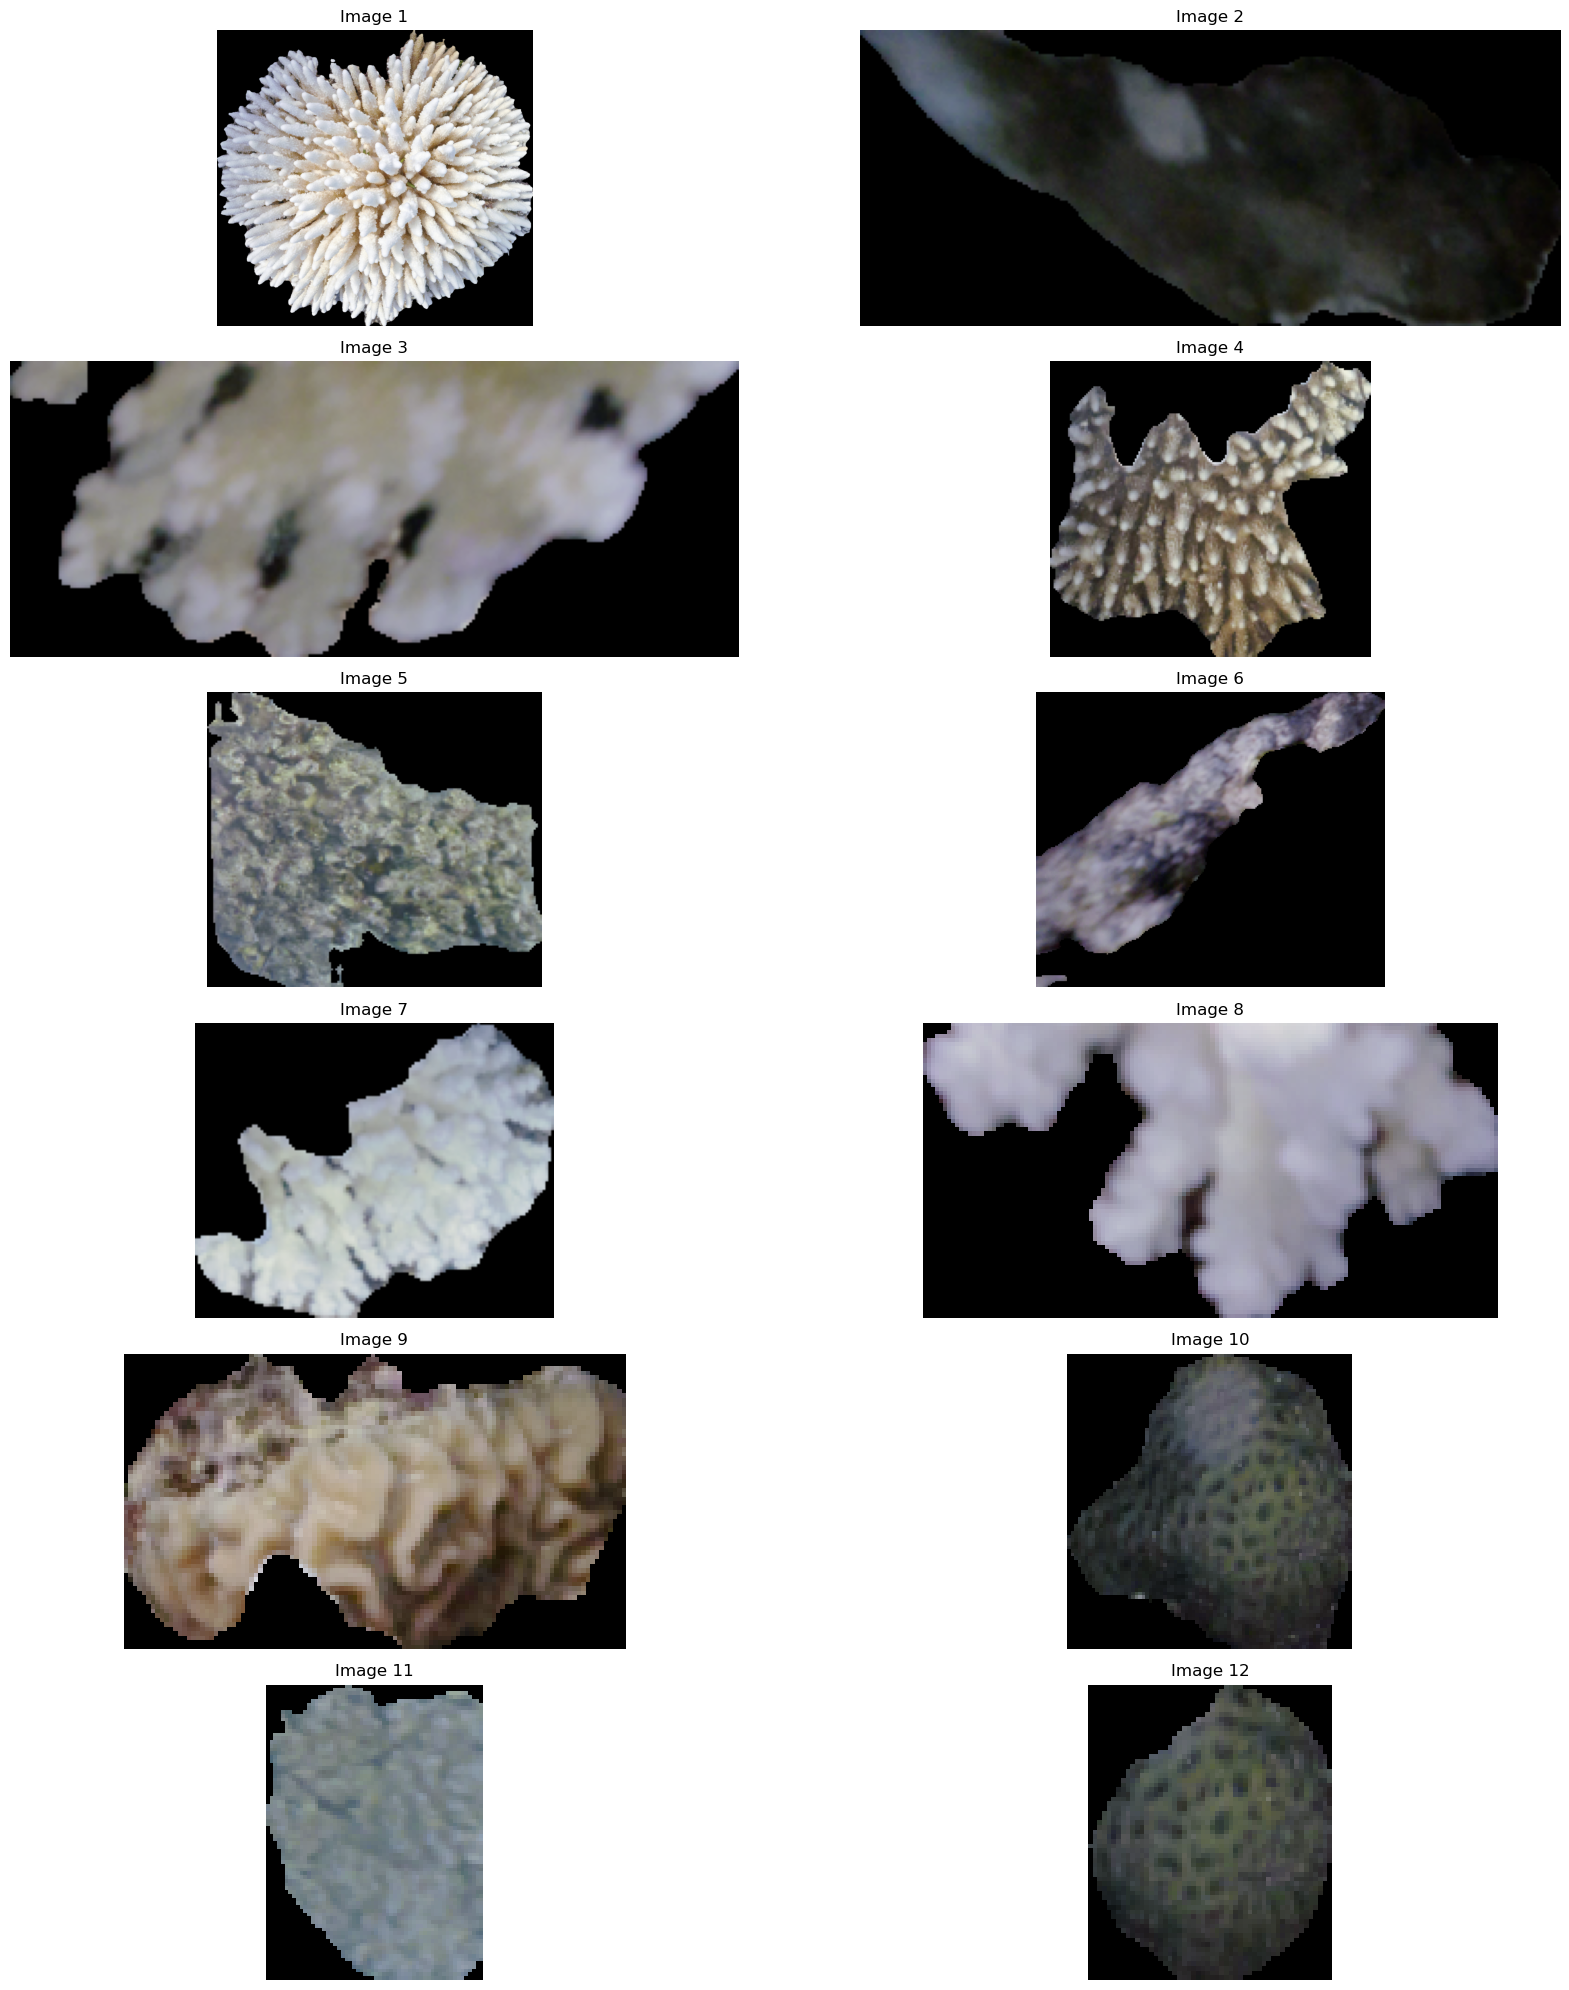

In [5]:
show_images_grid( images=list_of_images , titles=titles )

Just a friendly reminder that the color chart for this example is **arbitrary**. This is not the color chart from the experiment 

In [6]:
def custom_color_chart_load(my_file):
    my_personal_chart  = pd.read_csv(my_file, sep=":", header=None)
    my_personal_chart.set_index(0, inplace=True)
    my_personal_chart = my_personal_chart[1].apply(lambda x: tuple(map(int, x.replace("(","").replace(")","").split(",")))).to_dict()

    return my_personal_chart


In [7]:
my_personal_chart = custom_color_chart_load("../data/raw/custom_color_chart_example.txt")

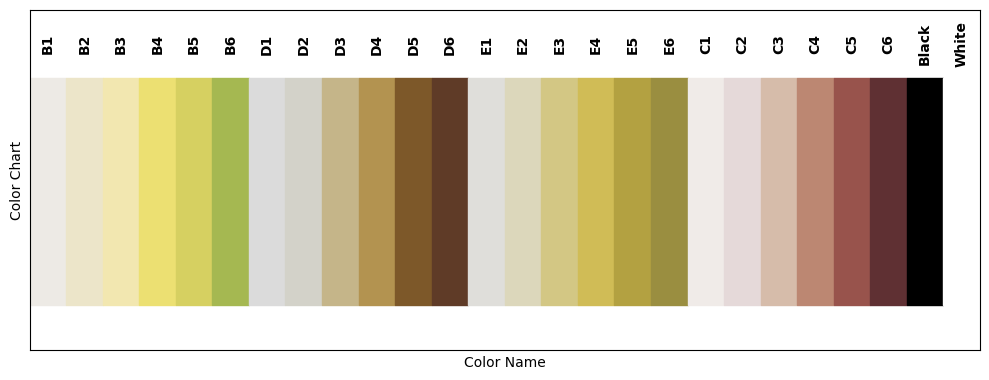

In [8]:
OcrAnalysis.plot_custom_colorchart(my_personal_chart)

This next step migth take a while, so be patient.

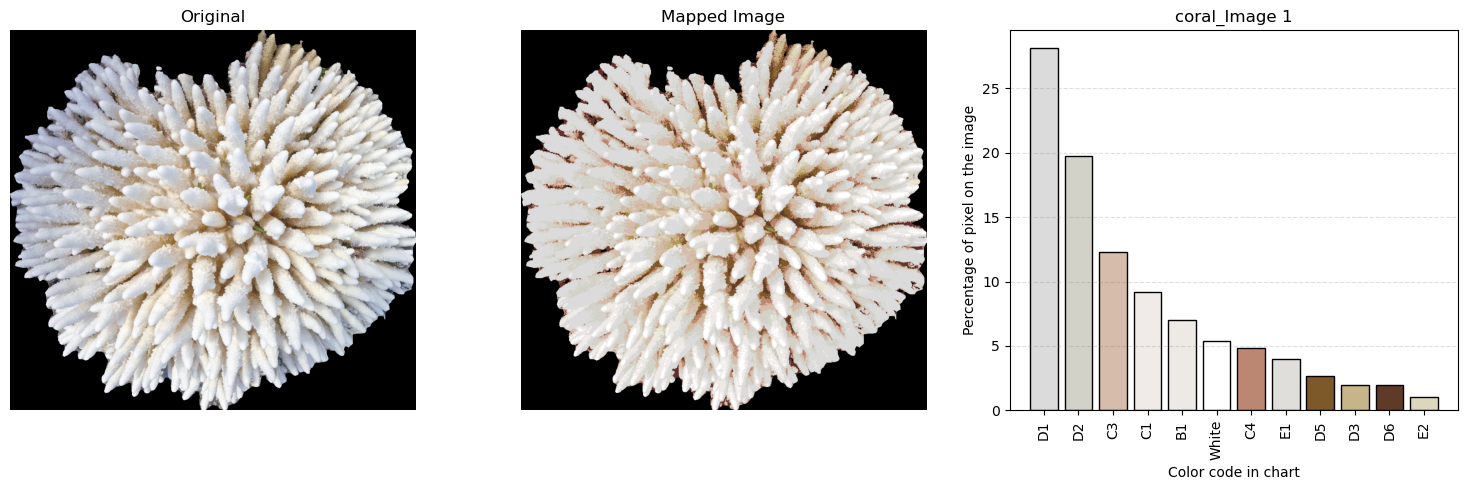

In [9]:
plot_compare_mapped_image_save (img1_rgb=list_of_images[0], filename=f"../data/final/coral_image_chart_mapped_colors/coral_{titles[0]}.jpg", color_map_RGB=my_personal_chart)